In the previous homework (HW#1), we have generated a network
of N = 1, 000 nodes and average degree hki = 6.0 according to the G(N, p) protocol. You
can recycle the previous network or generate a new one.


In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
N = 1000
k_avg = 6.0
P = k_avg / (N - 1)

In [5]:
G = nx.gnp_random_graph(N,P)

Plot the degree distribution and overlay
it on top of the corresponding Poisson distribution

In [13]:
#degree distribution
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
deg_d = np.unique(degree_sequence,return_counts=True)

In [15]:
from math import factorial, exp

In [47]:
deg_d

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([  3,  17,  39,  95, 134, 168, 134, 152, 100,  60,  54,  24,  12,
          4,   2,   2], dtype=int64))

In [27]:
#poisson distribution
pd = []
for i in deg_d[0] :
    pd.append(N*k_avg ** i * exp(-k_avg) / factorial(i))

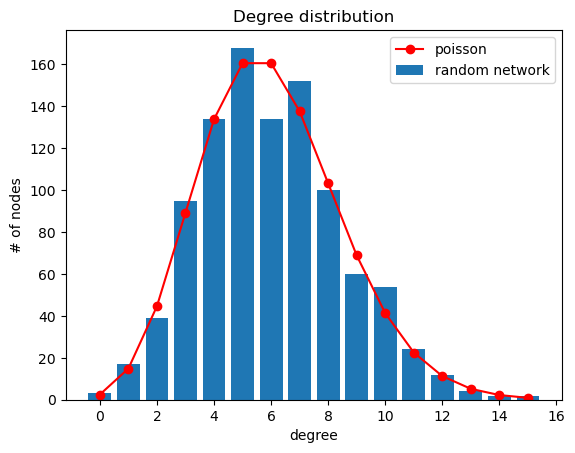

In [30]:
plt.bar(deg_d[0],deg_d[1], label = 'random network')
plt.plot(deg_d[0],pd,'-o', c = 'r', label = 'poisson')
plt.xlabel('degree')
plt.ylabel('# of nodes')
plt.title('Degree distribution')
plt.legend()

(b) Find the maximum and minimum expected degree based on poisson distribution

Let the P(k) the cumulative degree distribution of degree distribution pk. $$P(k_{min}-1) <{{1}\over{N}}$$ and $$1-P(k_{max}) <{{1}\over{N}}$$

In [31]:
pd

[2.4787521766663585,
 14.87251305999815,
 44.61753917999445,
 89.2350783599889,
 133.85261753998336,
 160.62314104798003,
 160.62314104798003,
 137.67697804112575,
 103.2577335308443,
 68.83848902056287,
 41.303093412337724,
 22.528960043093303,
 11.264480021546651,
 5.198990779175378,
 2.228138905360876,
 0.8912555621443504]

In [37]:
#commulative distribution
com = np.cumsum(pd)
com

array([  2.47875218,  17.35126524,  61.96880442, 151.20388278,
       285.05650032, 445.67964136, 606.30278241, 743.97976045,
       847.23749398, 916.07598301, 957.37907642, 979.90803646,
       991.17251648, 996.37150726, 998.59964617, 999.49090173])

In [45]:
for i in range(len(deg_d[0])) :
    if com[i] <=  1 :
        break
    elif i == len(deg_d[0])-1 :
        i = 0

k_min = i

In [46]:
k_min

0

In [43]:
for i in range(len(deg_d[0])) :
    if N- deg_d[0][i] <=  1 :
        print(N- deg_d[0][i])
        break

k_max = i

In [44]:
k_max

15

(c) Is it surprising that there could be a node such that k < kmin or k > kmax in (a)?
Discuss.


such k exists since this is the random graph. Poisson and binomial distribution can be expected but it is not real degree distribution. 
Since poisson has the domain for infinity and its values are no zero(coverge to zero), that is, the probability for k> kmin also non zero. Therefore, It can be possible.

In [51]:
(1.3/3.78)*(1000**(0.7)-1)/0.7

61.36065893168621